In [33]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pasta = "../data"
tabelas = os.listdir(pasta)

In [75]:
dfs = []

for tabela in tabelas:
    if tabela.endswith(".csv"):
        df = pd.read_csv(os.path.join(pasta, tabela))
        dfs.append(df)
df = pd.concat(dfs, ignore_index=True)

df.shape



(433766, 7)

Inicialmente, começamos o processo de AED

Optamos por começar analisando as variaveis caregóricas e suas caracteristicas:
"League","HomeTeam","AwayTeam","Result"

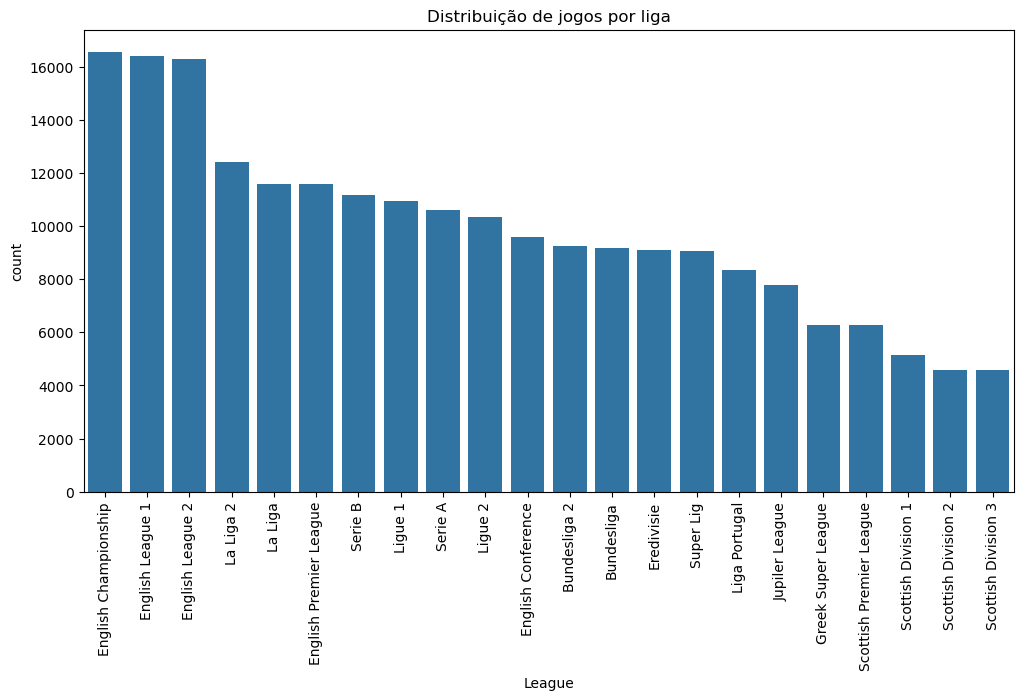

In [74]:
# Frequência de cada liga (quantos jogos por liga)

# Visualizar a distribuição de ligas (partidas/ligas)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='League', order=df['League'].value_counts().index)
plt.title('Distribuição de jogos por liga')
plt.xticks(rotation=90)
plt.show()

Result
H    98116
A    60539
D    58228
Name: count, dtype: int64


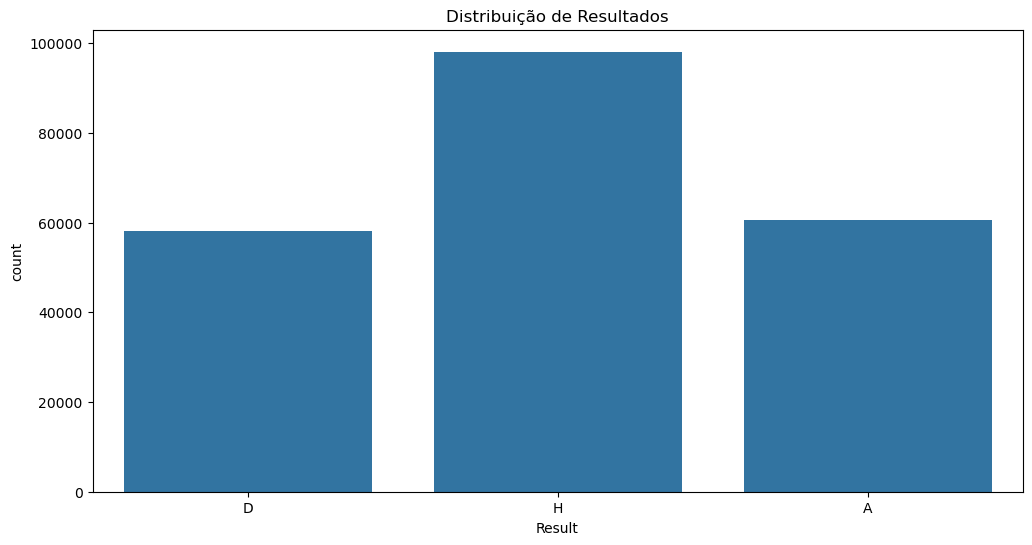

In [73]:
print(df['Result'].value_counts()) 

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Result')
plt.title('Distribuição de Resultados')
plt.show()

HomeGoals
1     72043
2     52926
0     50425
3     26134
4     10320
5      3517
6      1108
7       311
8        76
9        17
10        6
Name: count, dtype: int64


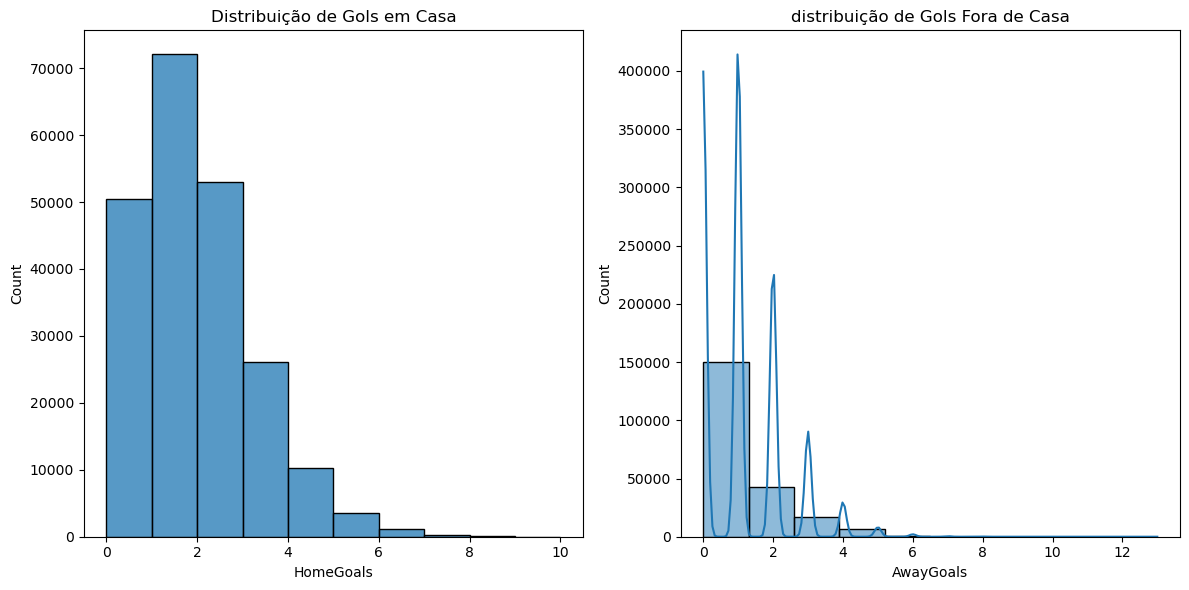

In [72]:
## Analisano os valores de Home e Away Gol'
print(df['HomeGoals'].value_counts())
plt.figure(figsize=(12,6))

## GomeGols
plt.subplot(1,2,1)
sns.histplot(df['HomeGoals'], kde=False,bins=10)
plt.title('Distribuição de Gols em Casa')

plt.subplot(1,2,2)
sns.histplot(df['AwayGoals'], kde=True, bins=10)
plt.title('distribuição de Gols Fora de Casa')

plt.tight_layout()
plt.show()

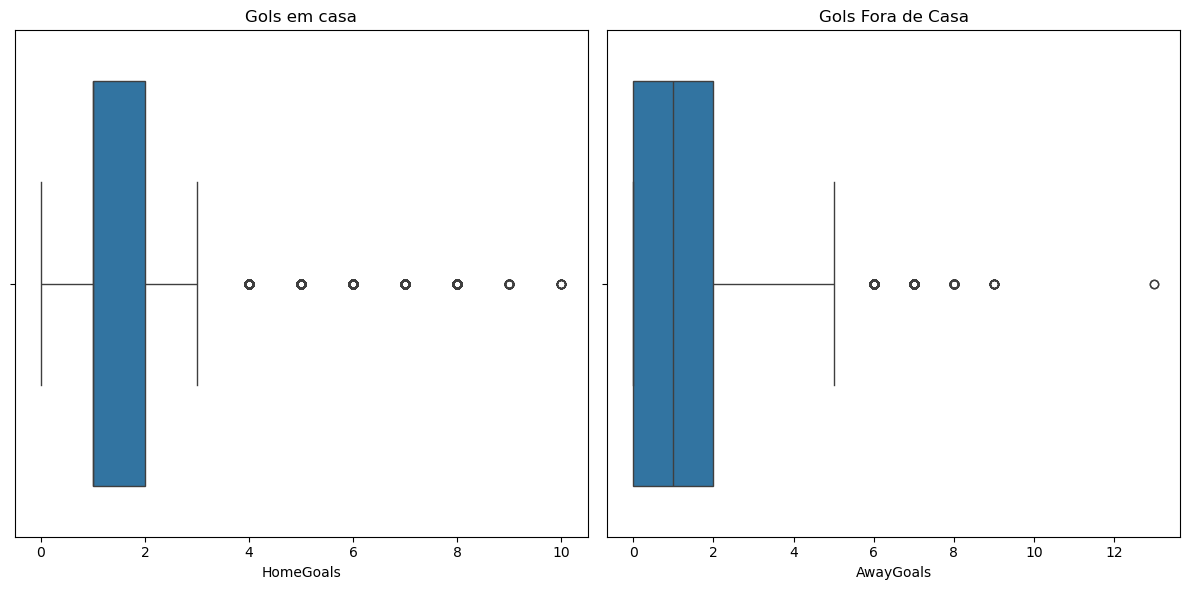

In [61]:
plt.figure(figsize=(12,6))

## Gerando boxplot para identificação de centralidade e Outliers

plt.subplot(1,2,1)
sns.boxplot(x=df['HomeGoals'])
plt.title('Gols em casa')

plt.subplot(1,2,2)
sns.boxplot(x=df['AwayGoals'])
plt.title('Gols Fora de Casa')

plt.tight_layout()
plt.show()

In [ ]:
## Verificando possiveis inconsistencias


df[df['AwayGoals']>10]
df['chave_unica'] = df['Date'] + df['HomeTeam'] + df['AwayTeam']
## df.head()

duplicados = df[df['chave_unica'].duplicated()]


df = df[~df['chave_unica'].duplicated()]
## print(df.head())

print(df[(df['Result'] == 'Draw') & (df['HomeGoals'] != df['AwayGoals'])])

In [80]:
df.to_csv('dataset_european_footbal.csv', index=False)

Com uma analise inicial ja podemos verificar alguns fatores:
    - Talvez exista a necessidade de adicionar uma coluna "winner" que define o vencedor afim de analisar resultado individual;
    - Surgem algumas considerações e hipoteses sobre influencia da liga e/ou se, jogar "em casa" realmente gera melhores resultados;
    
Neste ponto começamos a analisar os dados categórios presentes:
"League","HomeTeam","AwayTeam","Result"
